In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILE = 'data1.csv'

In [2]:
df = pd.read_csv(DATA_FILE)
df.head()

,SingleThreaded_cpu,SingleThreaded_wall,SingleThreadedSimd_cpu,SingleThreadedSimd_wall,OpenMP_cpu,OpenMP_wall,OpenMPSimd_cpu,OpenMPSimd_wall,CUDA_cpu,CUDA_wall,CUDASimd_cpu,CUDASimd_wall
0,729709,729718,266941,266939,5503660.0,95645,3800020.0,91493,1552,1559,1555,1562
1,777826,777828,268775,268771,5418700.0,97448,3845220.0,16294,1527,1532,1481,1486
2,778463,778453,277990,277988,5483970.0,22915,3963480.0,86185,1522,1527,1481,1487
3,785869,785866,271337,271333,3273900.0,86405,3847870.0,16637,1527,1532,1485,1489
4,738464,738471,279728,279725,7429350.0,101980,3655560.0,89197,1531,1537,1478,1483


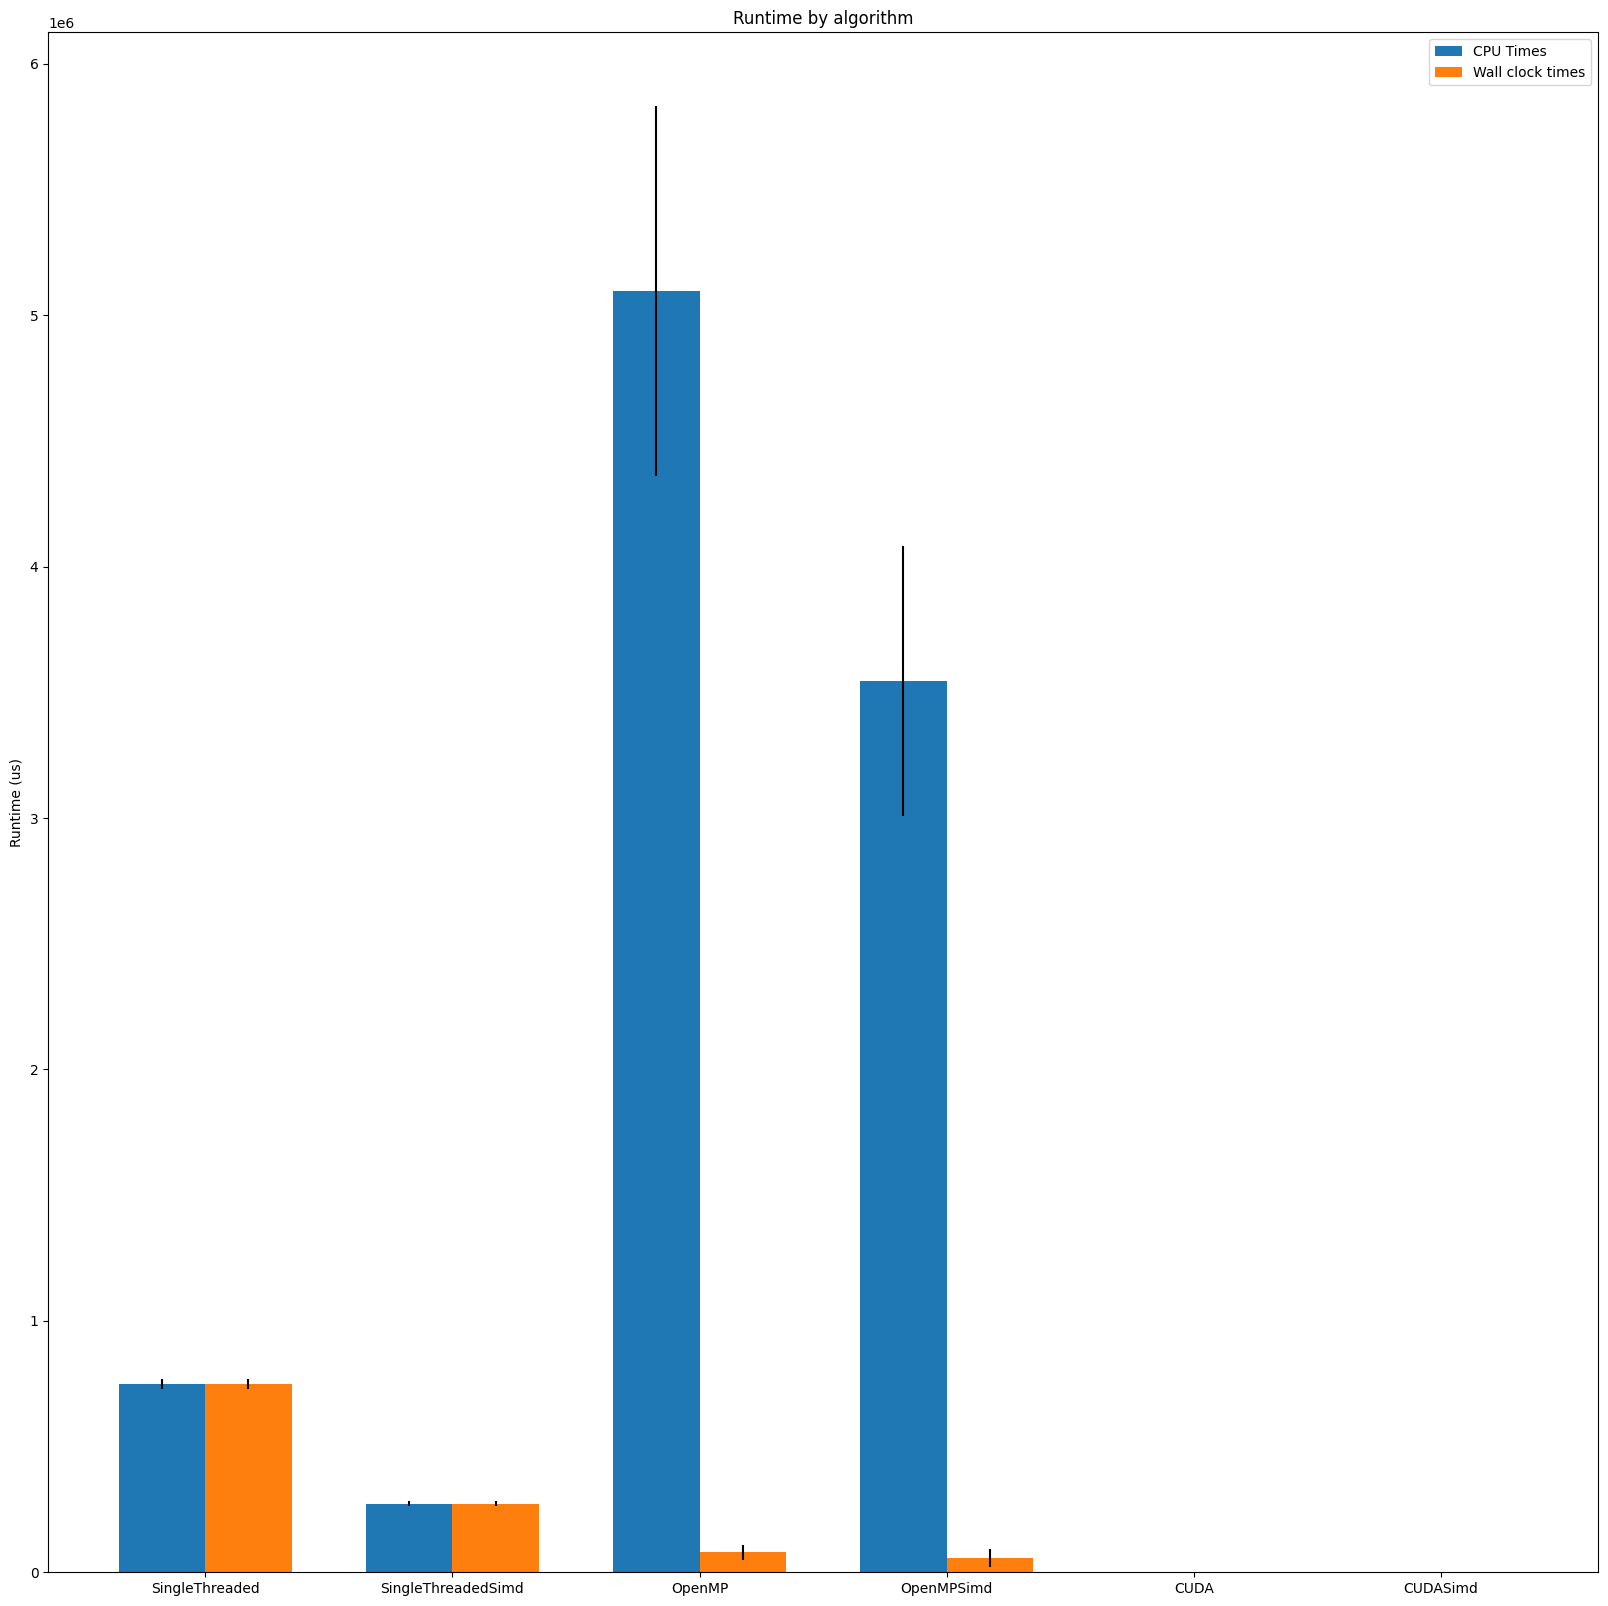

In [3]:
def plot_data(df, title, algo_names,fig_size=(20, 20)):
    fig, ax = plt.subplots(figsize=fig_size)
    
    width = 0.35
    x = np.arange(len(algo_names))
    
    cpu_means = []
    cpu_stds = []
    wall_means = []
    wall_stds = []
    
    for algo_name in algo_names:
        cpu_col_name = algo_name + '_cpu'
        wall_col_name = algo_name + '_wall'
        
        cpu_means.append(np.mean(df[cpu_col_name]))
        cpu_stds.append(np.std(df[cpu_col_name]))
        
        wall_means.append(np.mean(df[wall_col_name]))
        wall_stds.append(np.std(df[wall_col_name]))
    
    rects_cpu = ax.bar(x-(width/2), cpu_means, width, label='CPU Times', yerr=cpu_stds)
    rects_wall = ax.bar(x+(width/2), wall_means, width, label='Wall clock times', yerr=wall_stds)
    
    ax.set_ylabel('Runtime (us)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(algo_names)
    ax.legend()
    
    plt.show()
    
plot_data(df,
          'Runtime by algorithm',
          ['SingleThreaded', 'SingleThreadedSimd', 'OpenMP', 'OpenMPSimd', 'CUDA', 'CUDASimd'])

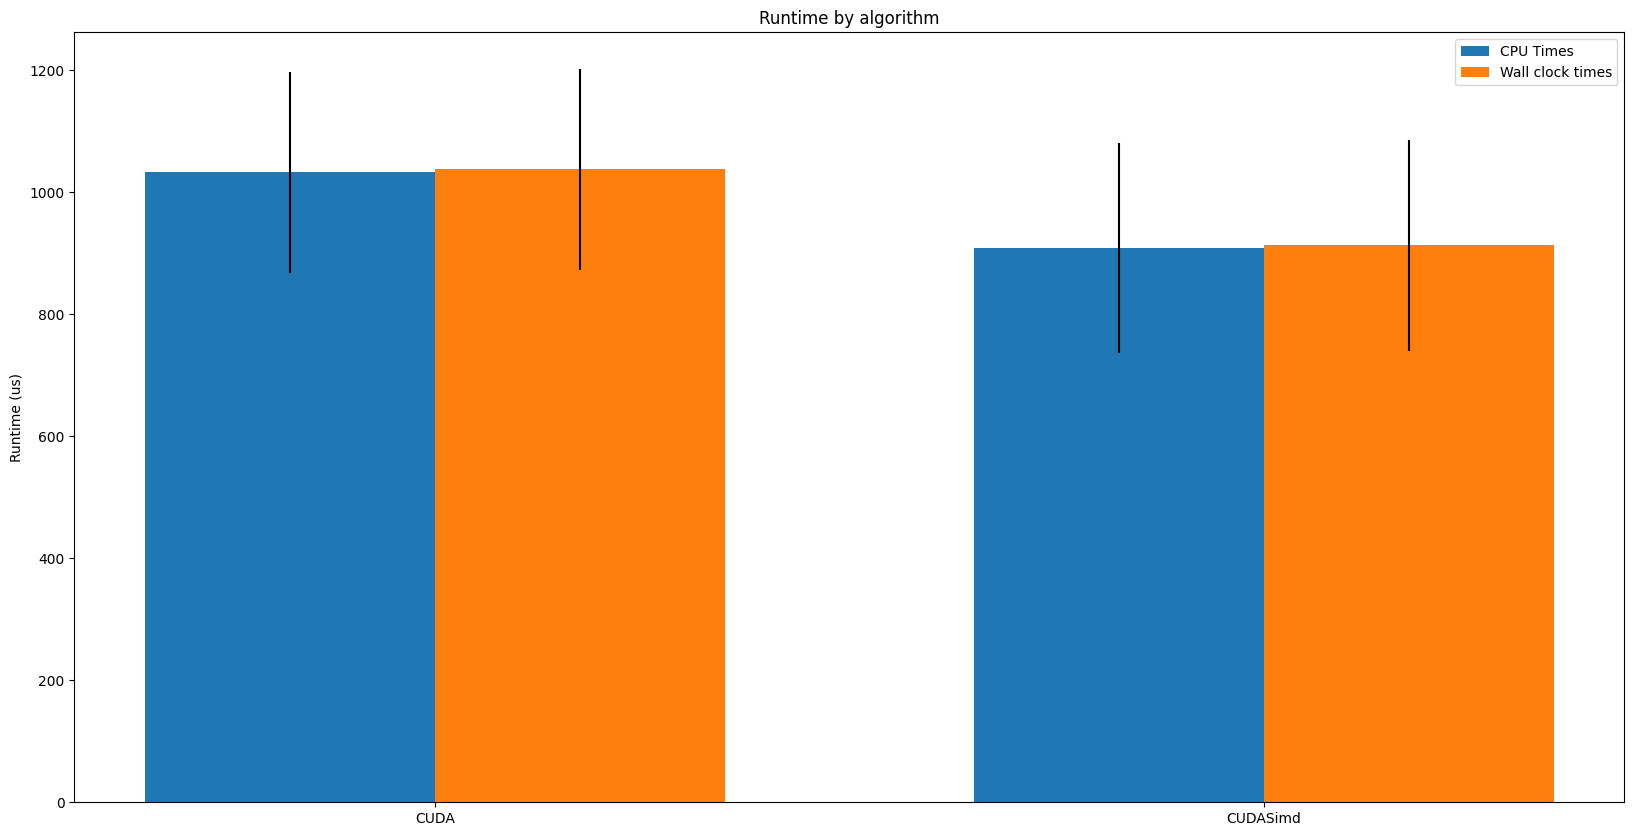

In [9]:
plot_data(df,
          'Runtime by algorithm', ['CUDA', 'CUDASimd'])